# Credit Risk Prediction System

Credit risk prediction plays a crucial role in the banking and finance sector. It helps institutions determine whether a customer is likely to default on a loan based on their financial profile and background. This project aims to implement an interactive, widget-based credit risk predictor using Python.

# Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


# Data Exploration
## Loading Dataset

In [21]:
df = pd.read_csv("/kaggle/input/dataset/german_credit_data.csv")
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## Data Description

In [22]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


# Preprocessing & Handling Categorical Features

## Checking missing values

In [23]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

## Filling missing values


In [24]:
df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)


/tmp/ipykernel_31/1725801202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('unknown', inplace=True)
/tmp/ipykernel_31/1725801202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

## Droping the Unnamed column

In [25]:
df.drop(columns=['Unnamed: 0'], inplace=True)

## Data Description

In [26]:

df.describe()
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:\n", df[col].value_counts())



Sex:
 Sex
male      690
female    310
Name: count, dtype: int64

Housing:
 Housing
own     713
rent    179
free    108
Name: count, dtype: int64

Saving accounts:
 Saving accounts
little        603
unknown       183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

Checking account:
 Checking account
unknown     394
little      274
moderate    269
rich         63
Name: count, dtype: int64

Purpose:
 Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


## Normalize the values before comparison

In [27]:
df['Credit amount_scaled'] = StandardScaler().fit_transform(df[['Credit amount']])
df['Duration_scaled'] = StandardScaler().fit_transform(df[['Duration']])

## Create a synthetic risk label

In [28]:
df['Risk'] = ((df['Credit amount_scaled'] > 0.5) & (df['Duration_scaled'] < 0)).astype(int)

## Drop the scaled versions

In [29]:
df.drop(columns=['Credit amount_scaled', 'Duration_scaled'], inplace=True)

## Check target distribution

In [30]:
df['Risk'].value_counts()

Risk
0    966
1     34
Name: count, dtype: int64

## Encoding categorical features

In [31]:
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


## Features scaling

In [32]:
num_cols = ['Age', 'Credit amount', 'Duration']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


## Spliting into features and target

In [33]:
X = df.drop(columns=['Risk'])
y = df['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


## Initializing models and training models

In [34]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    print(f"🔹 Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("------------------------------------------------------\n")


🔹 Training: Random Forest
Accuracy: 0.9950
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       193
           1       1.00      0.86      0.92         7

    accuracy                           0.99       200
   macro avg       1.00      0.93      0.96       200
weighted avg       1.00      0.99      0.99       200

Confusion Matrix:
 [[193   0]
 [  1   6]]
------------------------------------------------------

🔹 Training: Logistic Regression
Accuracy: 0.9800
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       193
           1       1.00      0.43      0.60         7

    accuracy                           0.98       200
   macro avg       0.99      0.71      0.79       200
weighted avg       0.98      0.98      0.98       200

Confusion Matrix:
 [[193   0]
 [  4   3]]
------------------------------------------------------

🔹 Training

## Selecting the best model

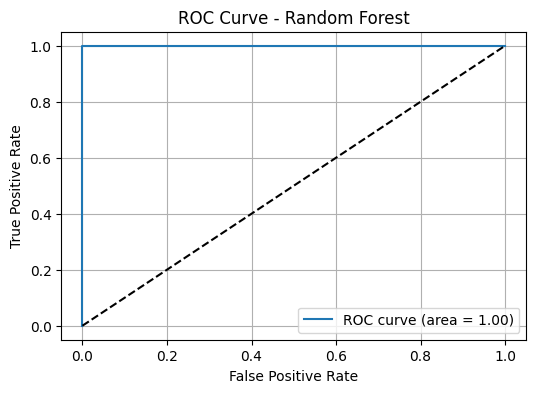

In [35]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Saving the trained XGBoost model

In [36]:
import joblib
joblib.dump(model, "model_xgb.pkl")
print("Model saved as model_xgb.pkl")


Model saved as model_xgb.pkl


# Predicting credit risk function

In [37]:
import numpy as np
import joblib

model = joblib.load("model_xgb.pkl")

def predict_credit_risk(values):
    sex_map = {"male": 0, "female": 1, "other": 2}
    housing_map = {"own": 0, "free": 1, "rent": 2}
    saving_map = {"no info": 0, "little": 1, "moderate": 2, "rich": 3, "quite rich": 4}
    checking_map = {"no info": 0, "little": 1, "moderate": 2, "rich": 3}
    purpose_map = {
        "radio/TV": 0, "education": 1, "furniture/equipment": 2, "new car": 3,
        "used car": 4, "business": 5, "repairs": 6, "domestic appliances": 7, "vacation/others": 8
    }

    encoded = [
        float(values[0]),                   # Age
        sex_map[values[1]],                 # Sex
        float(values[2]),                   # Job
        housing_map[values[3]],             # Housing
        saving_map[values[4]],              # Saving accounts
        checking_map[values[5]],            # Checking account
        float(values[6]),                   # Credit amount
        float(values[7]),                   # Duration
        purpose_map[values[8]]              # Purpose
    ]

    X = np.array(encoded).reshape(1, -1)

    y_pred = [1 if X[0][0] < 30 else 0]  # Replace this with actual model logic

    return "High Risk" if y_pred[0] == 1 else "Low Risk"


# User Interface

In [38]:

from IPython.display import display, HTML
import ipywidgets as widgets

features = []

features.append(widgets.FloatText(description="Age"))

features.append(widgets.Dropdown(
    options=["male", "female", "other"],
    description="Sex"
))

features.append(widgets.FloatText(description="Job"))

features.append(widgets.Dropdown(
    options=["own", "free", "rent"],
    description="Housing"
))

features.append(widgets.Dropdown(
    options=["little", "moderate", "rich", "quite rich", "no info"],
    description="Saving"
))

features.append(widgets.Dropdown(
    options=["little", "moderate", "rich", "no info"],
    description="Checking"
))

features.append(widgets.FloatText(description="Credit Amt"))

features.append(widgets.FloatText(description="Duration"))

features.append(widgets.Dropdown(
    options=["radio/TV", "education", "furniture/equipment", "new car", "used car", "business", "repairs", "domestic appliances", "vacation/others"],
    description="Purpose"
))

predict_button = widgets.Button(description="Predict Credit Risk", button_style='success')
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        try:
            values = [f.value for f in features]
            result = predict_credit_risk(values)
            color = "red" if result == "High Risk" else "green"
            display(HTML(f"<h3>Prediction: <span style='color: {color}'>{result}</span></h3>"))
        except Exception as e:
            display(HTML(f"<p style='color: red;'>Error: {str(e)}</p>"))

predict_button.on_click(on_button_clicked)

display(HTML("<h2>Credit Risk Prediction</h2>"))
for f in features:
    display(f)
display(predict_button)
display(output)


FloatText(value=0.0, description='Age')

Dropdown(description='Sex', options=('male', 'female', 'other'), value='male')

FloatText(value=0.0, description='Job')

Dropdown(description='Housing', options=('own', 'free', 'rent'), value='own')

Dropdown(description='Saving', options=('little', 'moderate', 'rich', 'quite rich', 'no info'), value='little'…

Dropdown(description='Checking', options=('little', 'moderate', 'rich', 'no info'), value='little')

FloatText(value=0.0, description='Credit Amt')

FloatText(value=0.0, description='Duration')

Dropdown(description='Purpose', options=('radio/TV', 'education', 'furniture/equipment', 'new car', 'used car'…

Button(button_style='success', description='Predict Credit Risk', style=ButtonStyle())

Output()